## Defining the problem - clearly identifying the problem to be solved
Boston Housing - Regression problem


## Data Collection - gathering necessary data from various sources

Importing the necessary libraries and defining the functions

In [534]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [535]:
# functions required
# calculate r-squared
def calculate_r2(y_pred, y_test):
    print("***** R2_score from sklearn.metrics: *****")
    print(r2_score(y_pred, y_test))
    print("y_test variance: ")
    print(y_test.var())
    print("y_test size: ")
    print(y_test.size)
    rse = float(((y_test - y_pred) **2).sum()) / float(y_test.size)
    print("RSE: ")
    print(rse)
    r2 = 1 - float(rse/y_test.var())
    print("***** R2 calculated for test observations: *****")
    print(r2)

def get_test_size():
    return 0.2

def get_random_state():
    return 0

# forward selection to select features
def forward_selection(X, y, max_features=None):
    remaining_features = list(X.columns)
    selected_features = []
    current_best_score = float('inf')

    if max_features is None:
        max_features = len(remaining_features)

    while remaining_features and len(selected_features) < max_features:
        best_feature = None
        for feature in remaining_features:
            temp_features = selected_features + [feature]
            model = LinearRegression()
            model.fit(X[temp_features], y)
            predictions = model.predict(X[temp_features])
            score = mean_squared_error(y, predictions)

            if score < current_best_score:
                current_best_score = score
                best_feature = feature

        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            print(f"Added feature: {best_feature}, Current MSE: {current_best_score}")
            current_best_score = float('inf')
        else:
             break
    return selected_features

# backward selection to select features
def backward_selection(X, y, min_features=1):
    selected_features = list(X.columns)
    current_best_score = float('inf')

    while len(selected_features) > min_features:
        worst_feature = None
        for feature in selected_features:
            temp_features = [f for f in selected_features if f != feature]
            model = LinearRegression()
            model.fit(X[temp_features], y)
            predictions = model.predict(X[temp_features])
            score = mean_squared_error(y, predictions)

            if score < current_best_score:
                current_best_score = score
                worst_feature = feature

        if worst_feature is not None:
            selected_features.remove(worst_feature)
            print(f"Removed feature: {worst_feature}, Current MSE: {current_best_score}")
            current_best_score = float('inf')
        else:
            break
    return selected_features

# transformations
def log_transform(data):
  return np.log(data)

def square_root_transform(data):
  return np.sqrt(data)

def log_10_transform(data):
  return np.log10(data)

def inverse_transform(data):
  return 1/data

## Data Cleaning and pre-processing

In [536]:
BHname = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
          'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv", delim_whitespace=True, names = BHname)
df.head()

/tmp/ipython-input-1225195446.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, names = BHname)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [537]:
print(f"Data Summary: \n{df.describe()}\n")
print(f"Data Shape: \n{df.shape}")

Data Summary: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.1

In [538]:
print(f"Nan values in data: \n{df.isna().sum()}\n")
print(f"Null values in data: \n{df.isnull().sum()}")

Nan values in data: 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Null values in data: 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### EDA - Exploratory Data Analysis - Analysing data to identify patterns, outliers

In [539]:
# coefficient of variation for different features - a relative measurement of dispersion
cv = (df.std() / df.mean()) * 100
print(cv)

CRIM       238.037610
ZN         205.237586
INDUS       61.600874
CHAS       367.202814
NOX         20.890339
RM          11.179921
AGE         41.048344
DIS         55.485809
RAD         91.181152
TAX         41.284120
PTRATIO     11.730604
B           25.596162
LSTAT       56.437413
MEDV        40.816505
dtype: float64


In [540]:
# correlation matrix of features
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Univariate Analysis

Number of bins: 22


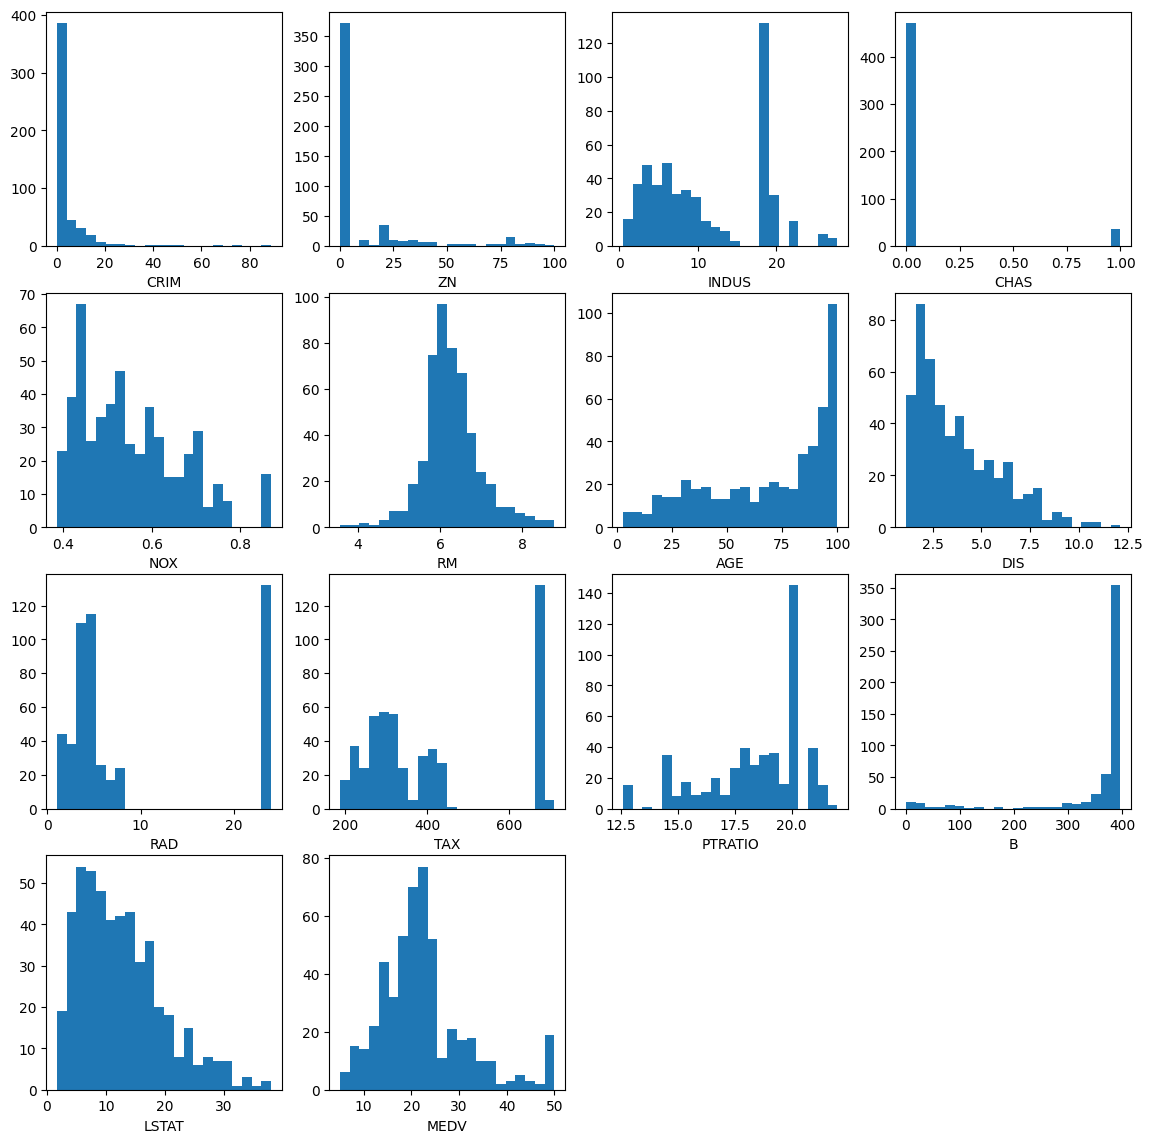

In [541]:
number_of_bins = round(np.sqrt(df.shape[0]))
print(f"Number of bins: {number_of_bins}")
plt.figure(figsize = (14, 14))
i = 1
for column in df.columns:
  plt.subplot(4, 4, i)
  plt.hist(df[column], bins = number_of_bins)
  plt.xlabel(column)
  i+=1
plt.show()

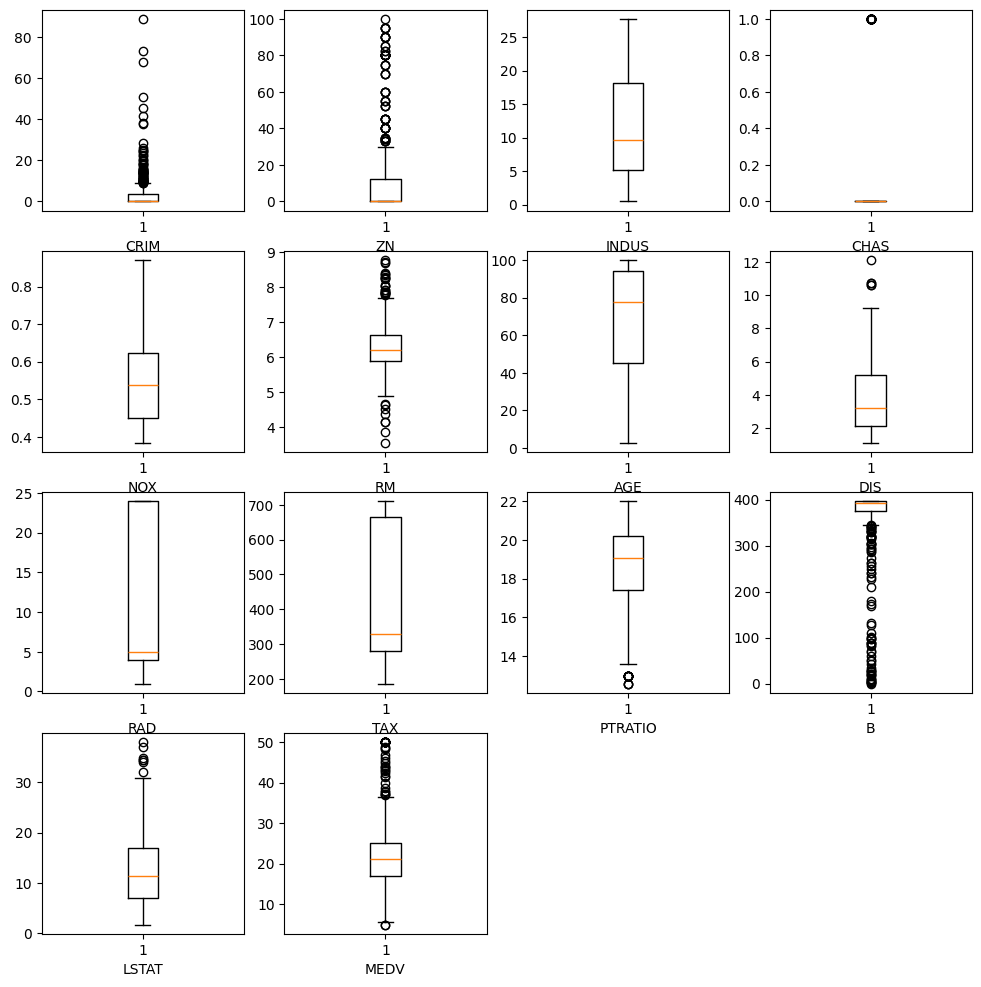

In [542]:
plt.figure(figsize = (12, 12))
i = 1
for column in df.columns:
  plt.subplot(4, 4, i)
  plt.boxplot(df[column])
  plt.xlabel(column)
  i+=1
plt.show()

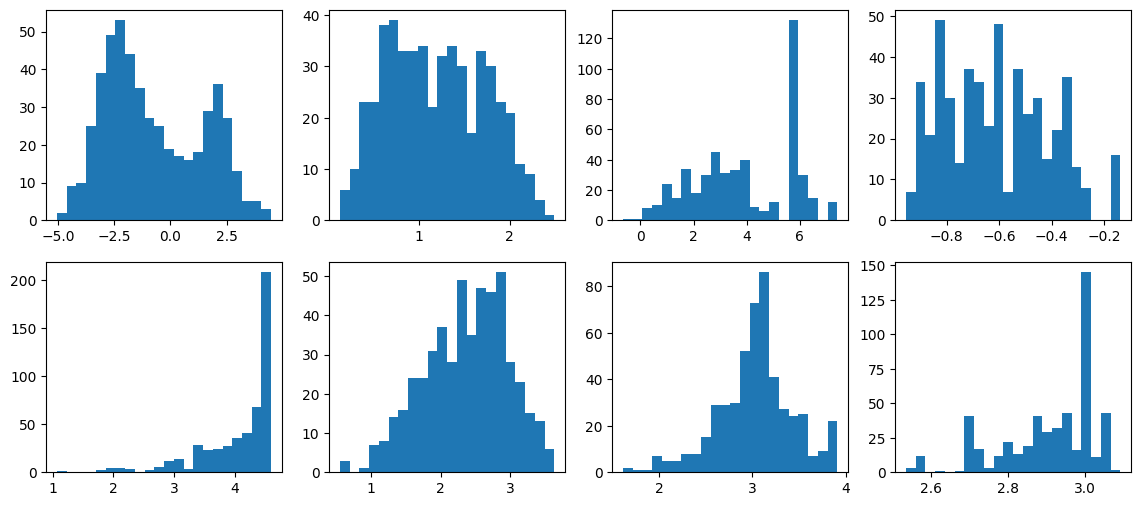

In [543]:
# transforming to normal
from scipy.stats import boxcox
df['CRIM'] = log_transform(df['CRIM'])
df['DIS'] = log_transform(df['DIS'])
df['INDUS'], indus_lambda_value = boxcox(df['INDUS'])
df['NOX'] = log_transform(df['NOX'])
df['AGE'] = log_transform(df['AGE'])
df['LSTAT'] = log_transform(df['LSTAT'])
df['MEDV'] = log_transform(df['MEDV'])
df['PTRATIO'] = log_transform(df['PTRATIO'])

plt.figure(figsize = (14, 6))

plt.subplot(2, 4, 1)
plt.hist(df['CRIM'], bins = number_of_bins)
plt.subplot(2, 4, 2)
plt.hist(df['DIS'], bins = number_of_bins)
plt.subplot(2, 4, 3)
plt.hist(df['INDUS'], bins = number_of_bins)
plt.subplot(2, 4, 4)
plt.hist(df['NOX'], bins = number_of_bins)
plt.subplot(2, 4, 5)
plt.hist(df['AGE'], bins = number_of_bins)
plt.subplot(2, 4, 6)
plt.hist(df['LSTAT'], bins = number_of_bins)
plt.subplot(2, 4, 7)
plt.hist(df['MEDV'], bins = number_of_bins)
plt.subplot(2, 4, 8)
plt.hist(df['PTRATIO'], bins = number_of_bins)

plt.show()

## regressor1 = model with all the rows and columns

In [544]:
y = df['MEDV']
X = df.loc[: , df.columns != 'MEDV']
print(y.shape)
print(X.shape)
X = sm.add_constant(X)
print(X.shape)
X.head(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = get_test_size(), random_state = get_random_state())
regressor1 = sm.OLS(y_train, X_train).fit()
print(regressor1.summary())
y_pred = regressor1.predict(X_test)
calculate_r2(y_pred, y_test)

(506,)
(506, 13)
(506, 14)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     122.4
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          1.02e-128
Time:                        17:38:35   Log-Likelihood:                 112.08
No. Observations:                 404   AIC:                            -196.2
Df Residuals:                     390   BIC:                            -140.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2535    

### regressor1 (with all rows and columns) => test r-squared = 59.32%

## Detect Outliers, High Leverage Points and Influence

### Detect Outliers

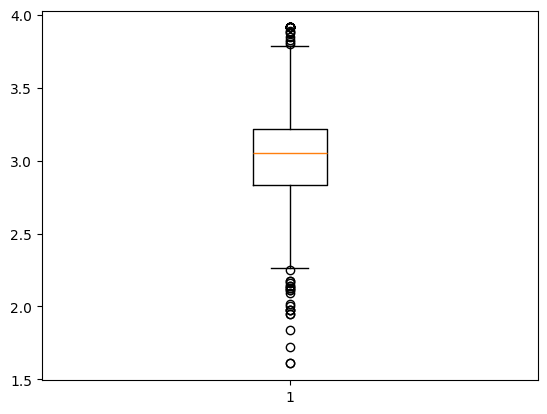

In [545]:
# Outliers detection using boxplot
boxplot = plt.boxplot(df['MEDV'])
plt.show()

In [546]:
outliers = [flier.get_ydata() for flier in boxplot["fliers"]][0]
print(max(outliers))
print(min(outliers))
print(outliers)
print(len(outliers))
outliers_indices = df[df['MEDV'].isin(outliers)].index
print(outliers_indices)

3.912023005428146
1.6094379124341003
[2.17475172 1.97408103 2.00148    2.14006616 1.60943791 1.84054963
 1.7227666  1.97408103 2.11625551 2.14006616 1.60943791 1.94591015
 1.97408103 2.01490302 2.17475172 2.12823171 2.11625551 2.2512918
 2.16332303 2.12823171 1.94591015 2.09186406 3.91202301 3.91202301
 3.91202301 3.91202301 3.91202301 3.91202301 3.8815638  3.91202301
 3.80220814 3.91202301 3.84374416 3.87743156 3.91202301 3.88773031
 3.91202301 3.81551211 3.8286414  3.91202301 3.91202301 3.91202301
 3.91202301 3.91202301 3.91202301]
45
Index([161, 162, 163, 166, 186, 195, 203, 204, 224, 225, 228, 233, 257, 262,
       267, 280, 282, 283, 368, 369, 370, 371, 372, 384, 385, 387, 397, 398,
       399, 400, 401, 403, 404, 405, 414, 415, 416, 418, 419, 425, 429, 437,
       438, 489, 490],
      dtype='int64')


In [547]:
print(df.shape)
df1 = df[~df['MEDV'].isin(outliers)]
print(df1.shape)
y1 = df1['MEDV']
X1 = df1.loc[:, df1.columns != 'MEDV']
print(y1.shape)
print(X1.shape)
X1 = sm.add_constant(X1)
print(y1.shape)
print(X1.shape)
X1.head(2)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = get_test_size(), random_state = get_random_state())
regressor2 = sm.OLS(y1_train, X1_train).fit()
print(regressor2.summary())
y1_pred = regressor2.predict(X1_test)
calculate_r2(y1_pred, y1_test)

(506, 14)
(461, 14)
(461,)
(461, 13)
(461,)
(461, 14)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     97.88
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          1.40e-108
Time:                        17:38:35   Log-Likelihood:                 190.67
No. Observations:                 368   AIC:                            -353.3
Df Residuals:                     354   BIC:                            -298.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### regressor2 (removing outliers detected by boxplot) => test r-squared = 74.43%, but 40 rows are removed

In [548]:
# Outliers detection using Z-scores
outliers_zscore = np.abs(regressor1.outlier_test()['bonf(p)']) < 0.05
print(outliers_zscore[outliers_zscore == True])
print(len(outliers_zscore[outliers_zscore == True]))
outliers_indices = outliers_zscore[outliers_zscore == True].index
print(outliers_indices)

412    True
405    True
398    True
Name: bonf(p), dtype: bool
3
Index([412, 405, 398], dtype='int64')


In [549]:
print(df.shape)
df2 = df.drop(index = outliers_indices)
print(df2.shape)
y2 = df2['MEDV']
X2 = df2.loc[:, df2.columns != 'MEDV']
X2 = sm.add_constant(X2)
print(y2.shape)
print(X2.shape)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = get_test_size(), random_state = get_random_state())
regressor3 = sm.OLS(y2_train, X2_train).fit()
print(regressor3.summary())
y2_pred = regressor3.predict(X2_test)
calculate_r2(y2_pred, y2_test)

(506, 14)
(503, 14)
(503,)
(503, 14)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.1
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          1.14e-123
Time:                        17:38:35   Log-Likelihood:                 109.83
No. Observations:                 402   AIC:                            -191.7
Df Residuals:                     388   BIC:                            -135.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

### regressor3 (removing outliers detected by Z-scores) => test r-squared = 71.61%, 3 rows are removed

### Check for high leverage points

In [550]:
# High Leverage points check using Leverage statistics (eg. Hat Matrix)
regressor4 = sm.OLS(y, X).fit()
influence = regressor4.get_influence()
leverage = influence.hat_matrix_diag
leverage_points = np.where(leverage > np.mean(leverage) + 2 * np.std(leverage))
print(leverage_points[0])
print(len(leverage_points[0]))

[ 41  74 142 152 155 156 161 162 163 214 253 283 342 364 365 367 368 369
 370 410 488 489 490 491 492]
25


In [551]:
print(df.shape)
df3 = df.drop(leverage_points[0], axis = 0)
print(df3.shape)
y3 = df3['MEDV']
X3 = df3.loc[:, df3.columns != 'MEDV']
X3 = sm.add_constant(X3)
print(y3.shape)
print(X3.shape)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = get_test_size(), random_state = get_random_state())
regressor5 = sm.OLS(y3_train, X3_train).fit()
print(regressor5.summary())
y3_pred = regressor5.predict(X3_test)
calculate_r2(y3_pred, y3_test)

(506, 14)
(481, 14)
(481,)
(481, 14)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     94.66
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          5.64e-109
Time:                        17:38:35   Log-Likelihood:                 96.933
No. Observations:                 384   AIC:                            -165.9
Df Residuals:                     370   BIC:                            -110.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

### regressor5 (removing high-leverage-points detected by hat-matrix) => test r-squared = 73.12%, but 17 rows are removed

In [552]:
# High Leverage check using Cook's distance
cook_distance = regressor4.get_influence().cooks_distance[0]
print(4 / df.shape[1])
influential_observations = np.where(cook_distance > 4 / df.shape[1])
print(influential_observations)

0.2857142857142857
(array([], dtype=int64),)


### Detecting High-leverage-points using Cook's distance resulted in no data

### Calculate Influence using DFFITS and DFBETAS

In [553]:
# Influence calculation using DFFITS and DFBETAS
dffits = regressor4.get_influence().dffits[0]
dfbetas = regressor4.get_influence().dfbetas
influential_dffits = np.where(np.abs(dffits) > 2 * np.sqrt(df.shape[1] * regressor4.df_model / regressor4.df_resid))
coefficient_index = 0  # Index of the coefficient to analyze
influential_dfbetas = np.where(np.abs(dfbetas[:, coefficient_index]) > 2 / np.sqrt(df.shape[1]))
print(influential_dffits[0])
print(influential_dfbetas[0])

[]
[]


In [554]:
df4 = df.drop(influential_dffits[0], axis = 0)
print(df4.shape)
y4 = df4['MEDV']
X4 = df4.loc[:, df4.columns != 'MEDV']
X4 = sm.add_constant(X4)
print(y4.shape)
print(X4.shape)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = get_test_size(), random_state = get_random_state())
regressor6 = sm.OLS(y4_train, X4_train).fit()
print(regressor6.summary())
y4_pred = regressor6.predict(X4_test)
calculate_r2(y4_pred, y4_test)

(506, 14)
(506,)
(506, 14)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     122.4
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          1.02e-128
Time:                        17:38:36   Log-Likelihood:                 112.08
No. Observations:                 404   AIC:                            -196.2
Df Residuals:                     390   BIC:                            -140.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2535    

### regressor6 (removing influence-points detected by DFFITS) => test r-squared = 69.56%, 1 row is removed

In [555]:
df5 = df.drop(influential_dfbetas[0], axis = 0)
print(df5.shape)
y5 = df5['MEDV']
X5 = df5.loc[:, df5.columns != 'MEDV']
X5 = sm.add_constant(X5)
print(y5.shape)
print(X5.shape)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = get_test_size(), random_state = get_random_state())
regressor7 = sm.OLS(y5_train, X5_train).fit()
print(regressor7.summary())
y5_pred = regressor7.predict(X5_test)
calculate_r2(y5_pred, y5_test)

(506, 14)
(506,)
(506, 14)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     122.4
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          1.02e-128
Time:                        17:38:36   Log-Likelihood:                 112.08
No. Observations:                 404   AIC:                            -196.2
Df Residuals:                     390   BIC:                            -140.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2535    

### regressor7 (removing influence-points detected by DFBETAS) => test r-squared = 74.56%, 3 rows are removed

## Checking Multicollinearity using VIF

In [556]:
print(X.columns)
X_vif1 = X.drop('const', axis = 1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif1.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif1.values, i)
                          for i in range(len(X_vif1.columns))]

print(vif_data)

Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
    feature         VIF
0      CRIM    8.933262
1        ZN    2.591935
2     INDUS   22.814743
3      CHAS    1.156339
4       NOX   61.845987
5        RM  116.970242
6       AGE  106.007922
7       DIS   27.883927
8       RAD   19.794043
9       TAX   58.784810
10  PTRATIO  408.969403
11        B   21.524833
12    LSTAT   50.312553


In [557]:
X_vif2 = X_vif1.drop('PTRATIO', axis = 1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif2.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif2.values, i)
                          for i in range(len(X_vif2.columns))]

print(vif_data)

   feature        VIF
0     CRIM   8.872372
1       ZN   2.496350
2    INDUS  20.517219
3     CHAS   1.152593
4      NOX  50.870618
5       RM  83.074928
6      AGE  95.170206
7      DIS  26.715634
8      RAD  19.664212
9      TAX  56.625647
10       B  20.379674
11   LSTAT  40.477281


In [558]:
X_vif3 = X_vif2.drop('NOX', axis = 1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif3.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif3.values, i)
                          for i in range(len(X_vif3.columns))]

print(vif_data)

   feature        VIF
0     CRIM   8.053676
1       ZN   2.496177
2    INDUS  20.446391
3     CHAS   1.149628
4       RM  74.149354
5      AGE  94.799545
6      DIS  17.657752
7      RAD  19.579440
8      TAX  56.625639
9        B  20.011697
10   LSTAT  39.813192


In [559]:
X_vif4 = X_vif3.drop('TAX', axis = 1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif4.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif4.values, i)
                          for i in range(len(X_vif4.columns))]

print(vif_data)

  feature        VIF
0    CRIM   8.028136
1      ZN   2.289879
2   INDUS  15.929465
3    CHAS   1.129103
4      RM  73.358706
5     AGE  94.354184
6     DIS  17.644010
7     RAD   9.043718
8       B  20.000479
9   LSTAT  38.990284


In [560]:
X_vif5 = X_vif4.drop('RM', axis = 1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif5.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif5.values, i)
                          for i in range(len(X_vif5.columns))]

print(vif_data)

  feature        VIF
0    CRIM   7.909428
1      ZN   2.227809
2   INDUS  15.342810
3    CHAS   1.128751
4     AGE  45.442149
5     DIS  13.924245
6     RAD   8.659346
7       B  19.315501
8   LSTAT  32.889024


In [561]:
X_vif6 = X_vif5.drop('B', axis = 1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif6.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif6.values, i)
                          for i in range(len(X_vif6.columns))]

print(vif_data)

  feature        VIF
0    CRIM   7.426942
1      ZN   2.226604
2   INDUS  15.044701
3    CHAS   1.126370
4     AGE  36.473108
5     DIS  12.974853
6     RAD   8.654288
7   LSTAT  32.723688


In [562]:
X_vif7 = X_vif6.drop('AGE', axis = 1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif7.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif7.values, i)
                          for i in range(len(X_vif7.columns))]

print(vif_data)

  feature        VIF
0    CRIM   6.932440
1      ZN   2.226443
2   INDUS  13.444395
3    CHAS   1.093678
4     DIS  12.619792
5     RAD   8.254975
6   LSTAT  20.095903


In [563]:
X_vif8 = X_vif7.drop('INDUS', axis = 1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif8.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif8.values, i)
                          for i in range(len(X_vif8.columns))]

print(vif_data)

  feature        VIF
0    CRIM   6.931326
1      ZN   2.136791
2    CHAS   1.061194
3     DIS  12.428116
4     RAD   7.826670
5   LSTAT   8.896892


### 'PTRATIO', 'NOX', 'TAX', 'RM', 'B', 'AGE', 'INDUS' has VIF values much larger than 5. We will remove these features and rebuild our model

In [564]:
y6 = df['MEDV']
X6 = df.drop(columns = ['PTRATIO', 'NOX', 'TAX', 'RM', 'B', 'AGE', 'INDUS'])
print(y6.shape)
print(X6.shape)
X6 = sm.add_constant(X6)
print(X6.shape)
print(X6.head(2))
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = get_test_size(), random_state = get_random_state())
regressor8 = sm.OLS(y6_train, X6_train).fit()
print(regressor8.summary())
y6_pred = regressor8.predict(X6_test)
calculate_r2(y6_pred, y6_test)

(506,)
(506, 7)
(506, 8)
   const      CRIM    ZN  CHAS       DIS  RAD    LSTAT      MEDV
0    1.0 -5.064036  18.0     0  1.408545    1  1.60543  3.178054
1    1.0 -3.600502   0.0     0  1.602836    2  2.21266  3.072693
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.256e+27
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:38:36   Log-Likelihood:                 11573.
No. Observations:                 404   AIC:                        -2.313e+04
Df Residuals:                     396   BIC:                        -2.310e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                

In [565]:
y_fs = df['MEDV']
X_fs = df.loc[: , df.columns != 'MEDV']
print(y_fs.shape)
print(X_fs.shape)
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_fs, y_fs, test_size = get_test_size(), random_state = get_random_state())
forward_selection_results = forward_selection(X_fs_train, y_fs_train)
print(forward_selection_results)

(506,)
(506, 13)
Added feature: LSTAT, Current MSE: 0.05177441125059137
Added feature: PTRATIO, Current MSE: 0.04371582255888091
Added feature: B, Current MSE: 0.04034811066169778
Added feature: RM, Current MSE: 0.0387096734627553
Added feature: TAX, Current MSE: 0.03691865661886776
Added feature: CHAS, Current MSE: 0.03605062059032904
Added feature: ZN, Current MSE: 0.03533697599308246
Added feature: AGE, Current MSE: 0.03509969165436349
Added feature: CRIM, Current MSE: 0.03480151877792638
Added feature: RAD, Current MSE: 0.03413853597404064
Added feature: DIS, Current MSE: 0.03393250756605277
Added feature: NOX, Current MSE: 0.03366343646284623
Added feature: INDUS, Current MSE: 0.03361608970008135
['LSTAT', 'PTRATIO', 'B', 'RM', 'TAX', 'CHAS', 'ZN', 'AGE', 'CRIM', 'RAD', 'DIS', 'NOX', 'INDUS']


In [566]:
y7 = df['MEDV']
X7 = df.drop(columns = ['ZN', 'CRIM', 'RAD', 'TAX', 'AGE', 'INDUS'])
print(y7.shape)
print(X7.shape)
X7 = sm.add_constant(X7)
print(X7.shape)
print(X7.head(2))
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size = get_test_size(), random_state = get_random_state())
regressor9 = sm.OLS(y7_train, X7_train).fit()
print(regressor9.summary())
y7_pred = regressor9.predict(X7_test)
calculate_r2(y7_pred, y7_test)

(506,)
(506, 8)
(506, 9)
   const  CHAS       NOX     RM       DIS   PTRATIO      B    LSTAT      MEDV
0    1.0     0 -0.619897  6.575  1.408545  2.727853  396.9  1.60543  3.178054
1    1.0     0 -0.757153  6.421  1.602836  2.879198  396.9  2.21266  3.072693
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.798e+27
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:38:37   Log-Likelihood:                 11969.
No. Observations:                 404   AIC:                        -2.392e+04
Df Residuals:                     395   BIC:                        -2.388e+04
Df Model:                           8                                         
Covariance Type:            no

In [567]:
y_bs = df['MEDV']
X_bs = df.loc[: , df.columns != 'MEDV']
print(y_bs.shape)
print(X_bs.shape)
X_bs_train, X_bs_test, y_bs_train, y_bs_test = train_test_split(X_bs, y_bs, test_size = get_test_size(), random_state = get_random_state())
backward_selection_results = backward_selection(X_bs_train, y_bs_train)
print(backward_selection_results)

(506,)
(506, 13)
Removed feature: INDUS, Current MSE: 0.033663436462846225
Removed feature: AGE, Current MSE: 0.033923917615915594
Removed feature: NOX, Current MSE: 0.03410346106606606
Removed feature: DIS, Current MSE: 0.03454127972859067
Removed feature: RAD, Current MSE: 0.03511551983919514
Removed feature: CRIM, Current MSE: 0.035336975993082456
Removed feature: ZN, Current MSE: 0.03605062059032903
Removed feature: CHAS, Current MSE: 0.03691865661886776
Removed feature: TAX, Current MSE: 0.03870967346275529
Removed feature: RM, Current MSE: 0.040348110661697786
Removed feature: B, Current MSE: 0.04371582255888091
Removed feature: PTRATIO, Current MSE: 0.05177441125059137
['LSTAT']
